In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
student_df = pd.read_csv('data/student.csv', index_col=0)
point_df = pd.read_csv('data/point.csv', index_col=0)

In [3]:
student_df.head()

,student_id,student_name,house,year
0,101,리안,래번클로,6
1,102,엘라라,후플푸프,5
2,103,카이,그리핀도르,2
3,104,셀레네,래번클로,4
4,105,아리온,래번클로,6


In [4]:
point_df.head()

,log_id,student_id,subject,points
0,1,110,마법의 역사,10
1,2,116,어둠의 마법 방어술,10
2,3,115,마법약,10
3,4,115,약초학,-10
4,5,119,약초학,5


In [5]:
eval_df = student_df.merge(point_df, on='student_id', how='left')
eval_df.head()

,student_id,student_name,house,year,log_id,subject,points
0,101,리안,래번클로,6,NaN,NaN,NaN
1,102,엘라라,후플푸프,5,19.0,변신술,20.0
2,102,엘라라,후플푸프,5,33.0,마법의 역사,5.0
3,102,엘라라,후플푸프,5,39.0,마법약,-5.0
4,103,카이,그리핀도르,2,8.0,마법약,10.0


In [6]:
eval_df.groupby(['house', 'subject'])[['points']].sum().sort_values(by=['house', 'points'], ascending=False)

points
house subject           
후플푸프  마법의 역사        20.0
      마법약           10.0
      변신술            5.0
      약초학           -5.0
      어둠의 마법 방어술   -15.0
슬리데린  변신술           15.0
      마법의 역사        10.0
      약초학           10.0
래번클로  변신술           35.0
      마법의 역사        15.0
      약초학           10.0
      어둠의 마법 방어술     5.0
      마법약          -15.0
      천문학          -20.0
그리핀도르 마법약           45.0
      천문학            5.0
      마법의 역사        -5.0
      어둠의 마법 방어술    -5.0
      변신술          -15.0

In [7]:
pd.pivot_table(eval_df, index='subject', columns='house', values='points', aggfunc='sum')

house,그리핀도르,래번클로,슬리데린,후플푸프
subject,,,,
마법약,45.0,-15.0,NaN,10.0
마법의 역사,-5.0,15.0,10.0,20.0
변신술,-15.0,35.0,15.0,5.0
약초학,NaN,10.0,10.0,-5.0
어둠의 마법 방어술,-5.0,5.0,NaN,-15.0
천문학,5.0,-20.0,NaN,NaN


In [2]:
student_df = pd.read_csv('data/student.csv', index_col=0)
point_df = pd.read_csv('data/point.csv', index_col=0)

# 데이터 merge
hogwarts_df = student_df.merge(point_df, on='student_id', how='left')

In [3]:
top_student_idx = hogwarts_df .groupby(['house', 'subject'])['points'].idxmax()

In [4]:
top_students_df = hogwarts_df.loc[top_student_idx]

In [7]:
top_students_df = top_students_df[top_students_df.points > 0]

In [8]:
pd.pivot_table(
    top_students_df,
    index=['house', 'student_name'],
    columns='subject',
    values='points',
    aggfunc='first'
)

subject              마법약  마법의 역사   변신술   약초학  어둠의 마법 방어술  천문학
house student_name                                           
그리핀도르 소피아            NaN     NaN  10.0   NaN        10.0  NaN
      카이            10.0     NaN   NaN   NaN         NaN  NaN
      헥토르            NaN     NaN   NaN   NaN         NaN  5.0
래번클로  릴리             NaN     NaN  20.0   NaN         5.0  NaN
      벨라            10.0     NaN   NaN   NaN         NaN  NaN
      셀레네            NaN     NaN   NaN  20.0         NaN  5.0
      클로에            NaN    20.0   NaN   NaN         NaN  NaN
슬리데린  이안             NaN    10.0  15.0  10.0         NaN  NaN
후플푸프  엘라라            NaN     NaN  20.0   NaN         NaN  NaN
      올리버            NaN    15.0   NaN   5.0         NaN  NaN
      제이크           10.0     NaN   NaN   NaN         5.0  NaN

In [8]:
data = {
    'Age': [22, 25, 30, 28, 35, 40, 45, 28, 25, 28],
    'Purchased': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No'],
    'Country': ['USA', 'Canada', 'Germany', 'USA', 'Germany', 'Canada', 'USA', 'Germany', 'Canada', 'USA']
}
df = pd.DataFrame(data)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le_purchased = LabelEncoder()
le_country = LabelEncoder()
df['Purchased_encoded'] = le_purchased.fit_transform(df['Purchased'])
df['Country_encoded'] = le_country.fit_transform(df['Country'])

In [12]:
df

,Age,Purchased,Country,Purchased_encoded,Country_encoded
0,22,Yes,USA,1,2
1,25,No,Canada,0,0
2,30,No,Germany,0,1
3,28,Yes,USA,1,2
4,35,Yes,Germany,1,1
5,40,No,Canada,0,0
6,45,No,USA,0,2
7,28,Yes,Germany,1,1
8,25,Yes,Canada,1,0
9,28,No,USA,0,2


In [15]:
df_encoded = pd.get_dummies(df, columns=['Purchased', 'Country'], drop_first=True)

In [16]:
df_encoded

,Age,Purchased_encoded,Country_encoded,Purchased_Yes,Country_Germany,Country_USA
0,22,1,2,1,0,1
1,25,0,0,0,0,0
2,30,0,1,0,1,0
3,28,1,2,1,0,1
4,35,1,1,1,1,0
5,40,0,0,0,0,0
6,45,0,2,0,0,1
7,28,1,1,1,1,0
8,25,1,0,1,0,0
9,28,0,2,0,0,1


In [17]:
data = {
    'Feature1': [100, 200, 300, 400, 500],
    'Feature2': [1, 2, 3, 4, 5],
    'Feature3': [10, 1000, 10000, 100000, 1000000]
}

df = pd.DataFrame(data)

In [18]:
ss = StandardScaler()
rs = RobustScaler()
mms = MinMaxScaler()

In [19]:
ss.fit_transform(df)

array([[-1.41421356, -1.41421356, -0.56870236],
       [-0.70710678, -0.70710678, -0.56616845],
       [ 0.        ,  0.        , -0.54313287],
       [ 0.70710678,  0.70710678, -0.31277709],
       [ 1.41421356,  1.41421356,  1.99078077]])

In [20]:
rs.fit_transform(df)

array([[-1.        , -1.        , -0.10090909],
       [-0.5       , -0.5       , -0.09090909],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.5       ,  0.5       ,  0.90909091],
       [ 1.        ,  1.        , 10.        ]])

In [21]:
mms.fit_transform(df)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.50000000e-01, 2.50000000e-01, 9.90009900e-04],
       [5.00000000e-01, 5.00000000e-01, 9.99009990e-03],
       [7.50000000e-01, 7.50000000e-01, 9.99909999e-02],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [51]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [38]:
taxis = sns.load_dataset('taxis')

In [39]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [40]:
taxis = taxis.dropna()

In [41]:
cat_cols = ['color', 'payment', 'pickup_borough', 'dropoff_borough']
taxis_encoded = pd.get_dummies(taxis, columns=cat_cols, drop_first=True)

In [43]:
num_cols = ['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']
rs = RobustScaler()
taxis_encoded[num_cols] = rs.fit_transform(taxis_encoded[num_cols])

In [44]:
taxis_encoded

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,pickup_zone,dropoff_zone,color_yellow,payment_credit card,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island
0,2019-03-23 20:21:09,2019-03-23 20:27:24,0.0,-0.022624,-0.294118,0.141844,0.0,-0.127368,Lenox Hill West,UN/Turtle Bay South,1,1,0,1,0,0,1,0,0
1,2019-03-04 16:11:55,2019-03-04 16:19:00,0.0,-0.389140,-0.529412,-0.620567,0.0,-0.511579,Upper West Side South,Upper West Side South,1,0,0,1,0,0,1,0,0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,0.0,-0.126697,-0.235294,0.216312,0.0,0.000000,Alphabet City,West Village,1,1,0,1,0,0,1,0,0
3,2019-03-10 01:23:59,2019-03-10 01:49:51,0.0,2.737557,2.058824,1.560284,0.0,2.398947,Hudson Sq,Yorkville West,1,1,0,1,0,0,1,0,0
4,2019-03-30 13:27:42,2019-03-30 13:37:14,2.0,0.230769,-0.058824,-0.230496,0.0,-0.080000,Midtown East,Yorkville West,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,0.0,-0.407240,-0.588235,-0.244681,0.0,-0.821053,East Harlem North,Central Harlem North,0,1,0,1,0,0,1,0,0
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,0.0,7.733032,5.705882,-0.620567,0.0,4.698947,Jamaica,East Concourse/Concourse Village,0,1,0,0,1,0,0,0,0
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,0.0,1.126697,0.764706,-0.620567,0.0,0.330526,Crown Heights North,Bushwick North,0,0,1,0,0,1,0,0,0
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,0.0,-0.239819,-0.411765,-0.620567,0.0,-0.774737,East New York,East Flatbush/Remsen Village,0,1,1,0,0,1,0,0,0


In [48]:
encoded_cols = [col for col in taxis_encoded.columns if any(col.startswith(prefix + '_') for prefix in cat_cols)] + num_cols

In [50]:
taxis_encoded = taxis_encoded[encoded_cols]

In [72]:
taxis_encoded.shape

(6341, 15)

In [52]:
pca =  PCA()

In [ ]:
pca.fit_transform(taxis_encoded)

In [62]:
cumulative = np.cumsum(pca.explained_variance_ratio_)

In [70]:
cumulative 

array([0.65012945, 0.78023769, 0.86281801, 0.92231942, 0.94962753,
       0.96276521, 0.97472447, 0.98357875, 0.99058901, 0.99611315,
       0.99871069, 0.99946645, 0.99975213, 0.99997391, 1.        ])

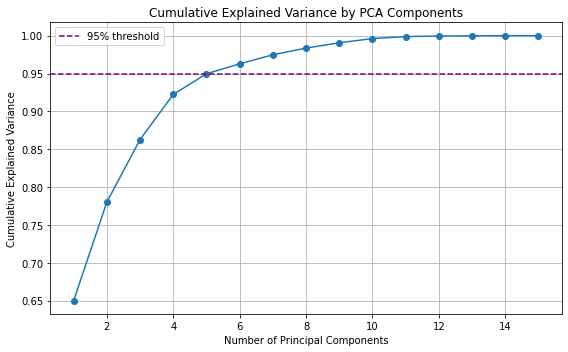

In [74]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative) + 1), cumulative, marker='o', linestyle='-')
plt.axhline(y=0.95, color='purple', linestyle='--', label='95% threshold')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

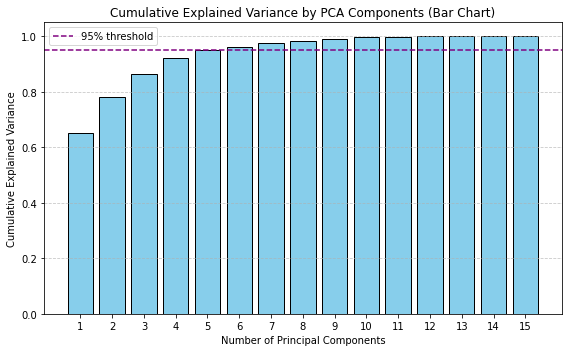

In [76]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(cumulative) + 1), cumulative, color='skyblue', edgecolor='black')
plt.axhline(y=0.95, color='purple', linestyle='--', label='95% threshold')
plt.title('Cumulative Explained Variance by PCA Components (Bar Chart)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative) + 1))
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()